In [21]:
import pandas as pd 
import numpy as np
from pandas.plotting import scatter_matrix 
import matplotlib.pyplot as plt 
from sklearn import model_selection 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [22]:
train = pd.read_csv('house sale.csv')


In [23]:
train.isnull().sum()

Number         0
Address        0
Bedrooms       0
Baths          0
SquareFeet     0
YearBuilt      0
YearSold       0
CostPerSqFt    0
SalePrice      0
dtype: int64

In [24]:
train.head()

,Number,Address,Bedrooms,Baths,SquareFeet,YearBuilt,YearSold,CostPerSqFt,SalePrice
0,1,1510 First Ave #112,2,1.0,1120,1993,2005,6.25,7000
1,2,1020 Center St,3,1.0,1224,1900,2006,22.06,27000
2,3,918 Chatterton St,4,1.0,1540,1970,2006,18.18,28000
3,4,1023 & 1025 Spring St.,3,1.0,1154,1900,2006,26.00,30000
4,5,503 2nd Ave,3,1.0,1277,1900,2005,24.08,30750


In [25]:
data = pd.DataFrame()

In [26]:
data['Bedrooms']=train['Bedrooms']
data['Baths']=train['Baths']
data['SquareFeet']=train['SquareFeet']
data['YearBuilt']=train['YearBuilt']
data['YearSold']=train['YearSold']
data['SalePrice']=train['SalePrice']

In [27]:
data.head()

,Bedrooms,Baths,SquareFeet,YearBuilt,YearSold,SalePrice
0,2,1.0,1120,1993,2005,7000
1,3,1.0,1224,1900,2006,27000
2,4,1.0,1540,1970,2006,28000
3,3,1.0,1154,1900,2006,30000
4,3,1.0,1277,1900,2005,30750


In [28]:
print(data.shape)

(929, 6)


In [29]:
print(data.describe())

         Bedrooms       Baths   SquareFeet    YearBuilt     YearSold  \
count  929.000000  929.000000   929.000000   929.000000   929.000000   
mean     3.194833    1.779333  1552.539290  1945.903122  2009.365985   
std      0.943293    0.743154   685.007177    37.209902     3.124149   
min      0.000000    0.000000     0.000000  1870.000000  2005.000000   
25%      3.000000    1.000000  1136.000000  1900.000000  2007.000000   
50%      3.000000    1.750000  1423.000000  1956.000000  2009.000000   
75%      4.000000    2.000000  1824.000000  1973.000000  2012.000000   
max      8.000000    6.000000  6815.000000  2013.000000  2015.000000   

           SalePrice  
count     929.000000  
mean   133203.720129  
std     77959.624697  
min      7000.000000  
25%     83000.000000  
50%    119340.000000  
75%    162500.000000  
max    606000.000000  


[]

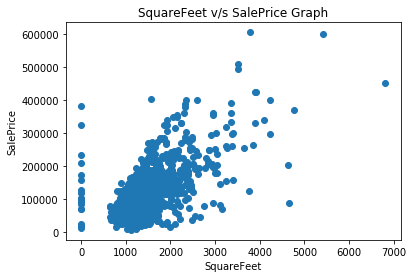

In [30]:
plt.scatter(data['SquareFeet'], data['SalePrice'])
plt.title('SquareFeet v/s SalePrice Graph')
plt.xlabel('SquareFeet')
plt.ylabel('SalePrice')
plt.plot()

In [31]:
Y = data.iloc[:,-1:].values
print(Y)

[[  7000]
 [ 27000]
 [ 28000]
 [ 30000]
 [ 30750]
 [ 42000]
 [ 46000]
 [ 49500]
 [ 50000]
 [ 50000]
 [ 52500]
 [ 54000]
 [ 54000]
 [ 58000]
 [ 58000]
 [ 59000]
 [ 59000]
 [ 60000]
 [ 60500]
 [ 62000]
 [ 64500]
 [ 70000]
 [ 72000]
 [ 72000]
 [ 73000]
 [ 75000]
 [ 75000]
 [ 75000]
 [ 75400]
 [ 76000]
 [ 76000]
 [ 76500]
 [ 77500]
 [ 78000]
 [ 78000]
 [ 79500]
 [ 79900]
 [ 80500]
 [ 81000]
 [ 82000]
 [ 82500]
 [ 84000]
 [ 88000]
 [ 88000]
 [ 90000]
 [ 90000]
 [ 90000]
 [ 94000]
 [ 95000]
 [ 95000]
 [ 95000]
 [ 95500]
 [ 97000]
 [ 97000]
 [ 97000]
 [ 97500]
 [ 98000]
 [ 99000]
 [100000]
 [105000]
 [105000]
 [108000]
 [108000]
 [109000]
 [109000]
 [110500]
 [110500]
 [113500]
 [114000]
 [116000]
 [117000]
 [117500]
 [119000]
 [119500]
 [119500]
 [121500]
 [122000]
 [123000]
 [125000]
 [125000]
 [125000]
 [126000]
 [126000]
 [127500]
 [128500]
 [130000]
 [131000]
 [131500]
 [132000]
 [133000]
 [135000]
 [135000]
 [137000]
 [139000]
 [139900]
 [141000]
 [152000]
 [153000]
 [154000]
 [155000]


In [32]:
data = data.copy()
del data['SalePrice']

X=data.iloc[::].values
print(X)

[[2.000e+00 1.000e+00 1.120e+03 1.993e+03 2.005e+03]
 [3.000e+00 1.000e+00 1.224e+03 1.900e+03 2.006e+03]
 [4.000e+00 1.000e+00 1.540e+03 1.970e+03 2.006e+03]
 ...
 [4.000e+00 3.000e+00 3.359e+03 1.993e+03 2.014e+03]
 [3.000e+00 2.500e+00 1.565e+03 1.987e+03 2.015e+03]
 [5.000e+00 6.000e+00 3.792e+03 1.990e+03 2.014e+03]]


In [33]:
std_x = StandardScaler()
std_y = StandardScaler()
X = std_x.fit_transform(X)
Y = std_y.fit_transform(Y)
print(X)

[[-1.26734461 -1.04924809 -0.63177772  1.26638998 -1.39824848]
 [-0.20665709 -1.04924809 -0.47987272 -1.234291   -1.07798891]
 [ 0.85403042 -1.04924809 -0.0183152   0.64794199 -1.07798891]
 ...
 [ 0.85403042  1.64343554  2.63856178  1.26638998  1.4840877 ]
 [-0.20665709  0.97026464  0.01820043  1.10505572  1.80434728]
 [ 1.91471794  5.682461    3.27101243  1.18572285  1.4840877 ]]


In [34]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.20, random_state=0)
print(train_X)

[[-1.26734461 -1.04924809 -0.53537647  0.08327209  0.2030494 ]
 [-0.20665709 -1.04924809 -0.48717584  1.5352804  -1.39824848]
 [-0.20665709  0.29709373  0.20954231 -1.234291   -0.43746975]
 ...
 [-0.20665709  1.64343554 -0.1001102   1.37394615  0.52330897]
 [-0.20665709  2.31660645 -0.19943271  0.54038582  0.2030494 ]
 [ 0.85403042 -0.37607718 -1.10794149  0.67483104  1.16382813]]


In [35]:
print(test_X)

[[-2.06657094e-01 -3.94917272e-02 -1.29322705e-01  4.05940608e-01
  -7.57729331e-01]
 [ 1.91471794e+00  9.70264636e-01  6.93223030e-02  1.61594753e+00
  -7.57729331e-01]
 [-2.06657094e-01 -3.94917272e-02 -3.70325840e-01 -1.23429100e+00
   8.43568550e-01]
 [-2.06657094e-01 -3.76077181e-01  5.71777323e-01 -1.01917866e+00
   1.48408770e+00]
 [-2.06657094e-01  9.70264636e-01  1.42353556e-01  1.48150232e+00
   1.48408770e+00]
 [ 8.54030423e-01 -3.94917272e-02  5.95147324e-01 -1.23429100e+00
  -1.07798891e+00]
 [-1.26734461e+00  2.97093727e-01 -3.36731463e-01  7.82387207e-01
  -7.57729331e-01]
 [-1.26734461e+00 -1.04924809e+00 -1.21602775e+00  1.10161138e-01
  -1.39824848e+00]
 [ 8.54030423e-01 -3.94917272e-02  6.93223030e-02  4.59718694e-01
  -1.07798891e+00]
 [-2.06657094e-01 -3.76077181e-01 -4.44817718e-01  8.09276250e-01
  -1.39824848e+00]
 [-2.06657094e-01 -3.76077181e-01 -7.88064606e-01 -1.23429100e+00
   8.43568550e-01]
 [-2.06657094e-01  2.97093727e-01  3.35156064e-01  1.26638998e+00

In [36]:
print(train_Y)

[[-2.78546887e-01]
 [-4.11167424e-02]
 [-7.98326394e-01]
 [-1.50206268e-01]
 [ 1.30645976e+00]
 [ 1.38560124e-01]
 [ 3.43905114e-01]
 [ 6.79727836e-02]
 [-1.95125485e-01]
 [-1.23468450e+00]
 [-1.36302512e+00]
 [-1.10634388e+00]
 [-4.11167424e-02]
 [ 7.05395960e-02]
 [-2.27210640e-01]
 [ 3.05830920e+00]
 [ 6.39088538e-01]
 [-2.84963918e-01]
 [-9.39501074e-01]
 [ 4.46577609e-01]
 [-4.90308908e-01]
 [-7.46990146e-01]
 [-6.18649527e-01]
 [-4.90308908e-01]
 [ 1.80057114e+00]
 [ 1.46688553e+00]
 [-9.79286666e-01]
 [-6.18649527e-01]
 [-5.99398434e-01]
 [ 7.22509940e-01]
 [-1.82291423e-01]
 [-5.39508043e-02]
 [ 3.43905114e-01]
 [-6.31483589e-01]
 [-2.33627671e-01]
 [-2.33627671e-01]
 [-9.88700209e-02]
 [-3.10632042e-01]
 [-4.64640785e-01]
 [-5.54479218e-01]
 [ 1.11394883e+00]
 [-4.51806723e-01]
 [-4.00470475e-01]
 [ 1.75436852e+00]
 [ 6.77590723e-01]
 [-9.26667013e-01]
 [ 3.32782450e+00]
 [-6.57151713e-01]
 [-8.60359590e-02]
 [ 1.51394186e-01]
 [-9.33084044e-01]
 [-5.03142970e-01]
 [-6.5073468

In [37]:
print(test_Y)

[[-0.21116806]
 [ 1.51180475]
 [-0.41330454]
 [ 1.01127633]
 [ 1.31929382]
 [ 0.66475666]
 [-0.77265827]
 [-0.9651692 ]
 [ 0.0294706 ]
 [-0.72773905]
 [-0.74699015]
 [-0.58014734]
 [-0.29779798]
 [ 0.24123262]
 [-0.7790753 ]
 [-0.16945736]
 [-0.86891373]
 [-0.72132202]
 [-0.10047428]
 [ 0.63908854]
 [-0.51597703]
 [ 0.42090949]
 [-0.20795955]
 [-0.54164516]
 [-0.26571283]
 [-0.29138095]
 [-0.8624967 ]
 [ 0.58775229]
 [-0.04111674]
 [-1.35019105]
 [-0.44538969]
 [-0.70207093]
 [ 0.25406668]
 [-0.49030891]
 [-0.58656437]
 [-0.13095518]
 [-0.90741592]
 [-1.28602075]
 [-1.42719543]
 [-1.06784169]
 [-0.45822375]
 [ 0.20273043]
 [-0.41330454]
 [-1.00367138]
 [ 0.20914746]
 [-1.19618231]
 [-0.6956539 ]
 [-0.0732019 ]
 [ 0.20914746]
 [ 1.60164318]
 [-1.32452293]
 [-1.01650545]
 [ 0.08722388]
 [ 0.41962608]
 [-0.56731328]
 [-0.9651692 ]
 [ 0.07438981]
 [-0.10528705]
 [ 0.93427196]
 [ 0.112892  ]
 [ 0.66475666]
 [ 2.23051221]
 [ 5.99089234]
 [ 0.02305357]
 [ 2.58986594]
 [-0.29779798]
 [-0.04111

In [38]:
regressor = DecisionTreeRegressor()
regressor.fit(train_X, train_Y)
test_score= regressor.score(test_X, test_Y)
training_score= regressor.score(train_X, train_Y)

In [39]:
print("the training score is ....." ,training_score)
print("the testing score is ....." ,test_score)

the training score is ..... 0.9995661198516458
the testing score is ..... 0.6080331091132007


In [40]:
Y_pred =regressor.predict(test_X)
rmse =np.sqrt(mean_squared_error(test_Y,Y_pred))

In [41]:
from sklearn.metrics import r2_score
r2 = r2_score(test_Y,Y_pred)
print("r2_score : ",r2)

r2_score :  0.6080331091132007


In [42]:
print("the Root Mean Square Error is .... ",rmse)

the Root Mean Square Error is ....  0.6913562761228801


Text(0.1, 7, 'Rmse = 0.691356 \n Score =0.9995661198516458 \n')

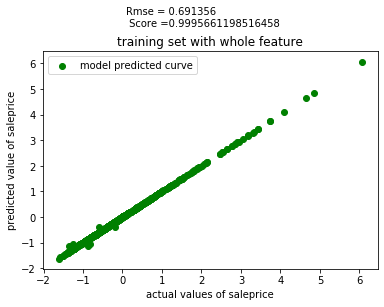

In [43]:
%matplotlib inline
plt.scatter(train_Y,regressor.predict(train_X),color='green',label='model predicted curve')
plt.title('training set with whole feature')
plt.xlabel('actual values of saleprice')
plt.ylabel('predicted value of saleprice')
plt.legend(loc='upper left')
plt.text(0.1,7, 'Rmse = %f \n Score =%s \n' %(rmse,training_score))

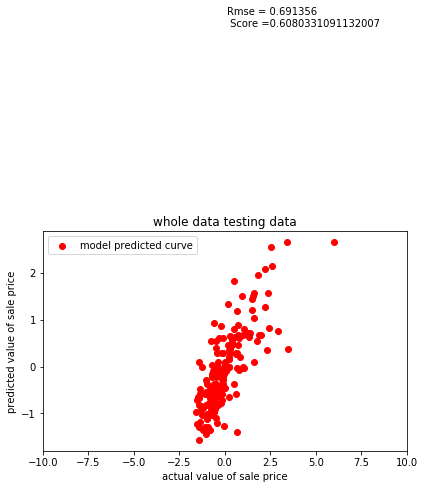

In [44]:
plt.scatter(test_Y,regressor.predict(test_X),color='red',label='model predicted curve')
plt.title('whole data testing data')
plt.xlabel('actual value of sale price')
plt.ylabel('predicted value of sale price')
plt.xlim(-10, 10)
plt.tight_layout()
plt.legend(loc='upper left')
plt.text(0.1,7, 'Rmse = %f \n Score =%s \n' %(rmse,test_score))

plt.show()